In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA


In [2]:
data = pd.read_csv('supermarket_sales.csv')


In [3]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [12]:
cluster_col_nm = ['Total']
cluster_col_str = ['Branch','City','Gender']
cluster_df_nm = data[cluster_col_nm]
cluster_df_str = data[cluster_col_str]

In [9]:
cluster_df.isnull().count()

Branch    1000
City      1000
Gender    1000
Total     1000
dtype: int64

In [19]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(),cluster_col_nm),
        ('cat', OneHotEncoder(), cluster_col_str)
    ]
)

In [21]:
X = preprocessor.fit_transform(data)

In [22]:
X

array([[ 0.91960685,  1.        ,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-0.98772956,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.07144605,  1.        ,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-1.17810859,  1.        ,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-1.03293176,  1.        ,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.32783657,  1.        ,  0.        , ...,  1.        ,
         1.        ,  0.        ]])

In [26]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

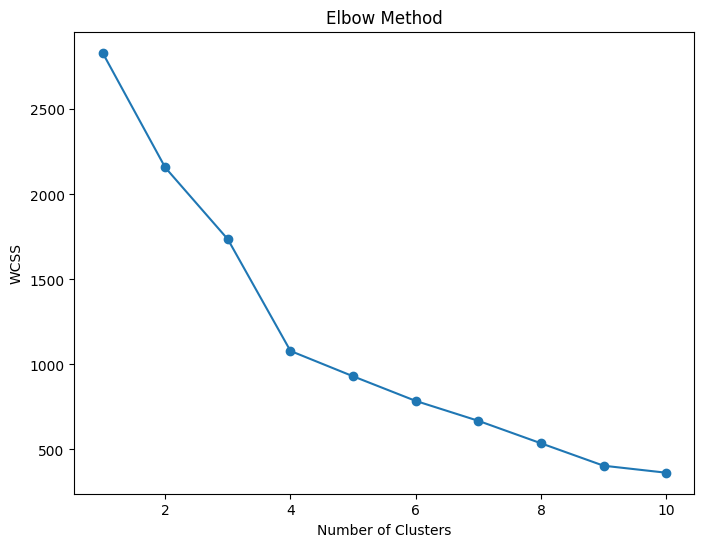

In [27]:
plt.figure(figsize= (8,6))
plt.plot(range(1,11),wcss, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
optimal_cluster = 4

kmeans = KMeans(n_clusters = 4,random_state= 42)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [29]:
labels = kmeans.labels_
data['Cluster'] = labels

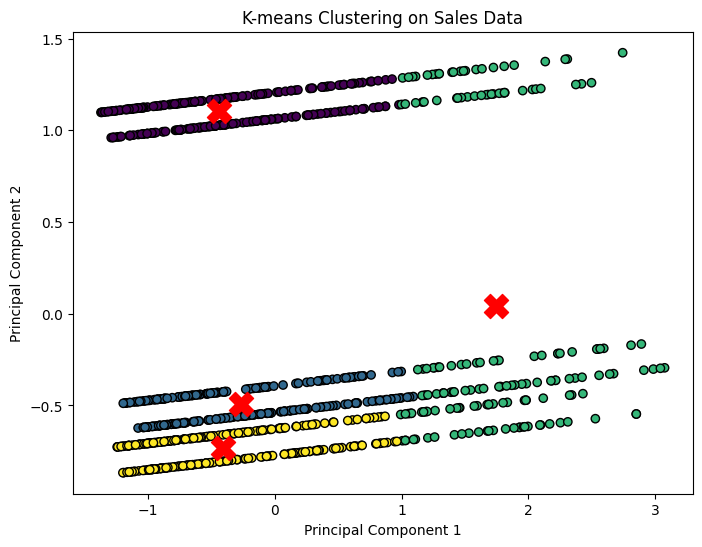

In [31]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], s=300, c='red', marker='X')
plt.title('K-means Clustering on Sales Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [32]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Cluster
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,0
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2


In [35]:
for cluster in range(optimal_cluster):
    cluster_data = data[data['Cluster'] == cluster]
    print(f"\nCluster {cluster} data:")
    print(cluster_data.head())


Cluster 0 data:
    Invoice ID Branch    City Customer type  Gender            Product line  \
0  750-67-8428      A  Yangon        Member  Female       Health and beauty   
2  631-41-3108      A  Yangon        Normal    Male      Home and lifestyle   
3  123-19-1176      A  Yangon        Member    Male       Health and beauty   
6  355-53-5943      A  Yangon        Member  Female  Electronic accessories   
8  665-32-9167      A  Yangon        Member  Female       Health and beauty   

   Unit price  Quantity   Tax 5%     Total       Date   Time      Payment  \
0       74.69         7  26.1415  548.9715   1/5/2019  13:08      Ewallet   
2       46.33         7  16.2155  340.5255   3/3/2019  13:23  Credit card   
3       58.22         8  23.2880  489.0480  1/27/2019  20:33      Ewallet   
6       68.84         6  20.6520  433.6920  2/25/2019  14:36      Ewallet   
8       36.26         2   3.6260   76.1460  1/10/2019  17:15  Credit card   

     cogs  gross margin percentage  gross inc